In [ ]:
# Import necessary libraries
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import io

# Step 1: Create the file upload widget (CSV only)
upload_button = widgets.FileUpload(
    accept='.csv',
    multiple=False
)


# Display the upload widget
display(upload_button)

# Step 2: Define what happens after a file is uploaded
def on_file_uploaded(change):
    if upload_button.value:
        # Support both tuple and dictionary structure for uploaded files
        file_data = upload_button.value[0] if isinstance(upload_button.value, tuple) else next(iter(upload_button.value.values()))
        content = file_data['content']
        
        # Read the uploaded file into a DataFrame
        df = pd.read_csv(io.BytesIO(content))

        # Display results
        print("File loaded successfully.\n")
        
        print("First 5 rows of the dataset:")
        display(df.head())

        print("\nDataFrame Info:")
        df.info()

        print("\nDescriptive Statistics:")
        display(df.describe())

        print("\nMissing Values Count:")
        display(df.isnull().sum())
    else:
        print("No file uploaded.")

# Step 3: Link the upload widget to the function
upload_button.observe(on_file_uploaded, names='value')


FileUpload(value=(), accept='.csv', description='Upload')

,Year,Avg_Temp_C,Rainfall_mm,CO2_Emissions_MT,Wheat_Yield_tph,Rice_Yield_tph,Population_million,Climate_Risk_Index,Disaster_Count,GDP_per_capita_USD,Urbanization_Pct,Water_Stress_Index,Air_Pollution_PM2.5,Agricultural_Land_Pct,Renewable_Energy_Pct
0,2000,24.75,278.2,100.69,2.79,2.34,140.0,34.0,3,480,32.5,4.2,65,45.2,10.1
1,2001,24.43,304.4,99.08,3.11,2.34,144.3,25.5,6,490,33.1,4.5,64,45.0,10.3
2,2002,24.82,254.0,105.87,2.28,2.30,148.7,37.0,1,505,33.7,4.8,66,44.8,10.5
3,2003,25.26,315.0,107.06,2.96,2.26,153.0,23.0,2,520,34.3,5.0,67,44.5,10.8
4,2004,24.38,276.0,109.08,2.82,2.09,157.4,32.9,2,540,35.0,5.2,68,44.3,11.0


,Year,Avg_Temp_C,Rainfall_mm,CO2_Emissions_MT,Wheat_Yield_tph,Rice_Yield_tph,Population_million,Climate_Risk_Index,Disaster_Count,GDP_per_capita_USD,Urbanization_Pct,Water_Stress_Index,Air_Pollution_PM2.5,Agricultural_Land_Pct,Renewable_Energy_Pct
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2012.500000,24.408462,290.492308,133.236538,2.761923,2.320385,194.353846,29.719231,3.192308,711.346154,40.084615,7.353846,76.500000,42.146154,13.111538
std,7.648529,0.471370,34.223067,21.155385,0.193329,0.141999,33.275952,5.233432,2.116964,150.834729,4.612218,1.908556,7.648529,1.907507,1.893215
min,2000.000000,23.540000,221.600000,99.080000,2.280000,2.010000,140.000000,22.000000,0.000000,480.000000,32.500000,4.200000,64.000000,39.000000,10.100000
25%,2006.250000,24.130000,272.375000,118.080000,2.667500,2.262500,167.175000,25.425000,2.000000,585.000000,36.350000,5.775000,70.250000,40.575000,11.550000
50%,2012.500000,24.380000,291.650000,132.095000,2.750000,2.305000,194.350000,29.400000,3.000000,710.000000,40.100000,7.350000,76.500000,42.150000,13.100000
75%,2018.750000,24.727500,308.275000,150.442500,2.870000,2.357500,221.525000,33.725000,4.750000,835.000000,43.850000,8.925000,82.750000,43.725000,14.650000
max,2025.000000,25.290000,374.100000,172.000000,3.110000,2.670000,248.800000,41.000000,8.000000,960.000000,47.600000,10.500000,89.000000,45.200000,16.200000


Year                     0
Avg_Temp_C               0
Rainfall_mm              0
CO2_Emissions_MT         0
Wheat_Yield_tph          0
Rice_Yield_tph           0
Population_million       0
Climate_Risk_Index       0
Disaster_Count           0
GDP_per_capita_USD       0
Urbanization_Pct         0
Water_Stress_Index       0
Air_Pollution_PM2.5      0
Agricultural_Land_Pct    0
Renewable_Energy_Pct     0
dtype: int64

In [34]:
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import io

# Create upload widget
upload = widgets.FileUpload(
    accept='.csv',
    multiple=False
)
display(upload)

# Upload handler
def on_upload_change(change):
    if upload.value:
        # This works whether value is tuple or list
        uploaded_file = upload.value[0]
        content = uploaded_file['content']
        
        # Convert bytes to DataFrame
        df = pd.read_csv(io.BytesIO(content))
        
        # Store df globally for reuse in plots
        globals()['df'] = df

        # Display results
        print("File loaded successfully.\n")
        display(df.head())
    else:
        print("No file uploaded.")

# Connect the handler
upload.observe(on_upload_change, names='value')


FileUpload(value=(), accept='.csv', description='Upload')

,Year,Avg_Temp_C,Rainfall_mm,CO2_Emissions_MT,Wheat_Yield_tph,Rice_Yield_tph,Population_million,Climate_Risk_Index,Disaster_Count,GDP_per_capita_USD,Urbanization_Pct,Water_Stress_Index,Air_Pollution_PM2.5,Agricultural_Land_Pct,Renewable_Energy_Pct
0,2000,24.75,278.2,100.69,2.79,2.34,140.0,34.0,3,480,32.5,4.2,65,45.2,10.1
1,2001,24.43,304.4,99.08,3.11,2.34,144.3,25.5,6,490,33.1,4.5,64,45.0,10.3
2,2002,24.82,254.0,105.87,2.28,2.30,148.7,37.0,1,505,33.7,4.8,66,44.8,10.5
3,2003,25.26,315.0,107.06,2.96,2.26,153.0,23.0,2,520,34.3,5.0,67,44.5,10.8
4,2004,24.38,276.0,109.08,2.82,2.09,157.4,32.9,2,540,35.0,5.2,68,44.3,11.0


c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


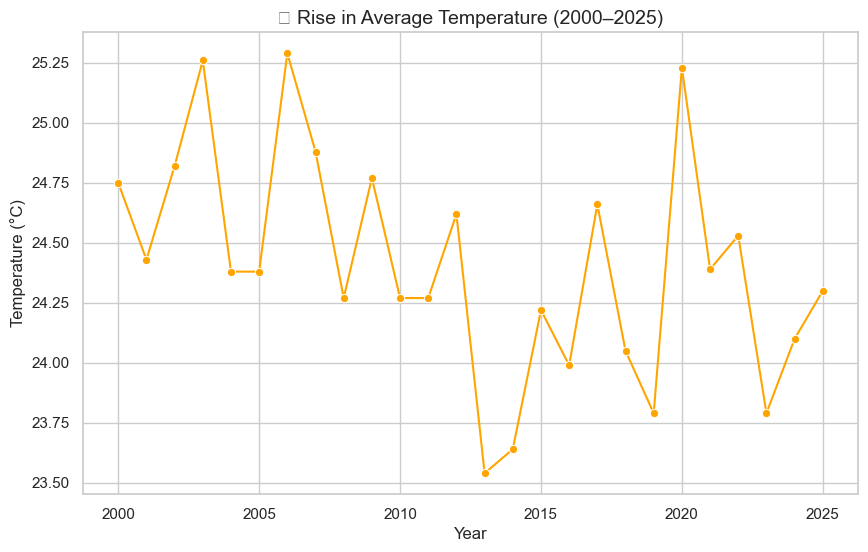

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Avg_Temp_C', marker='o', color='orange')
plt.title('🔥 Rise in Average Temperature (2000–2025)', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


C:\Users\GHULAM MUSTAFA\AppData\Local\Temp\ipykernel_6036\589268102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='viridis')


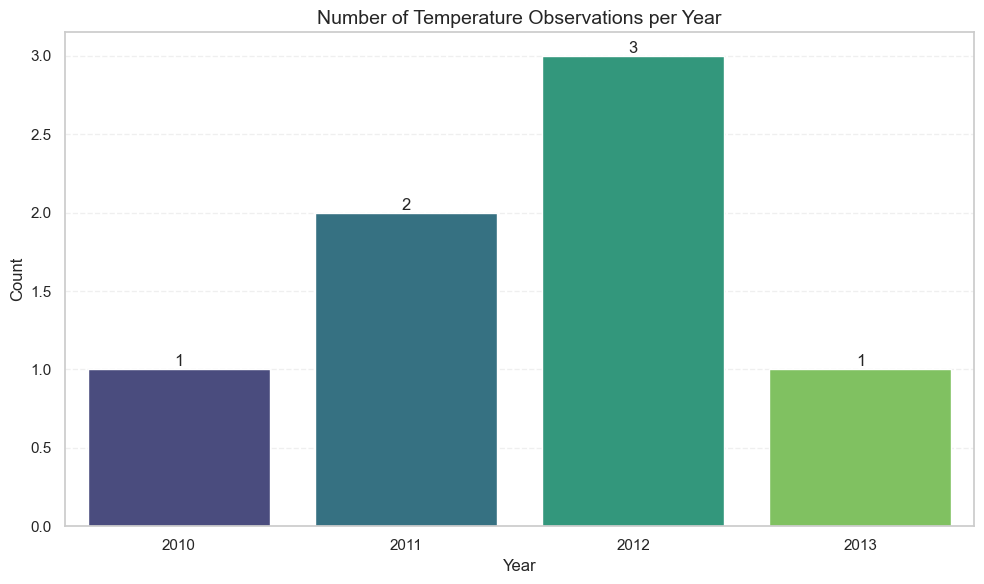

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'Year': [2010, 2011, 2011, 2012, 2012, 2012, 2013],
    'Avg_Temp_C': [22.5, 23.1, 22.9, 22.8, 23.0, 22.7, 23.5]
}
df = pd.DataFrame(data)

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', palette='viridis')

# Add count labels
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.title('Number of Temperature Observations per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\GHULAM MUSTAFA\AppData\Local\Temp\ipykernel_6036\629319644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Year', y='Disaster_Count', palette='coolwarm')
c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127786 (\N{CLOUD WITH TORNADO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


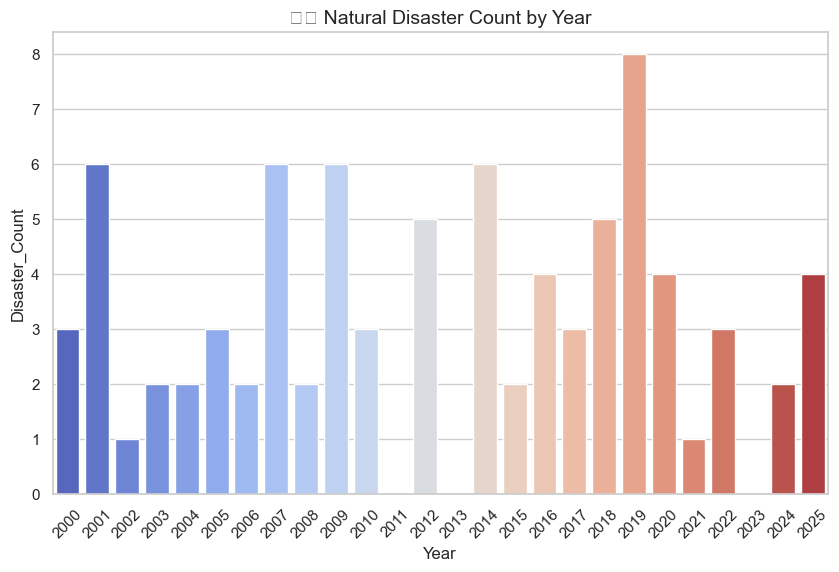

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Year', y='Disaster_Count', palette='coolwarm')
plt.title('🌪️ Natural Disaster Count by Year', fontsize=14)
plt.xticks(rotation=45)
plt.show()


c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


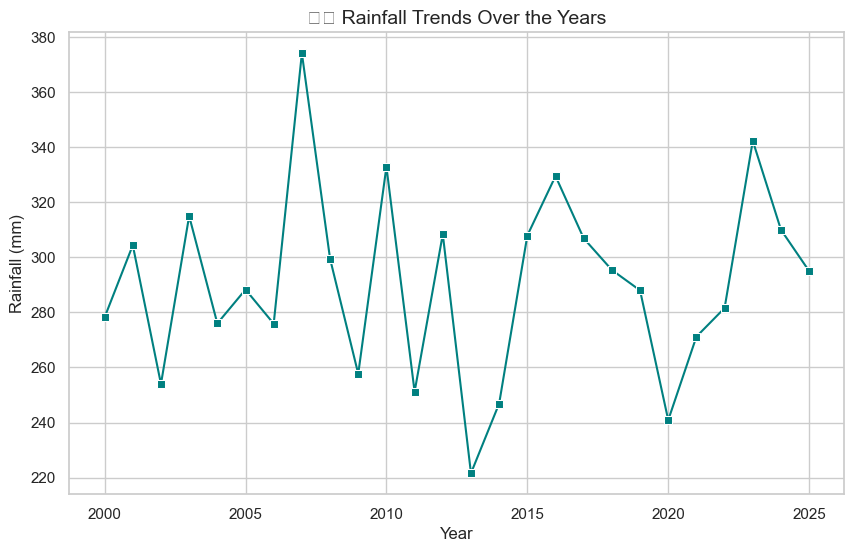

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Rainfall_mm', marker='s', color='teal')
plt.title('🌧️ Rainfall Trends Over the Years', fontsize=14)
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


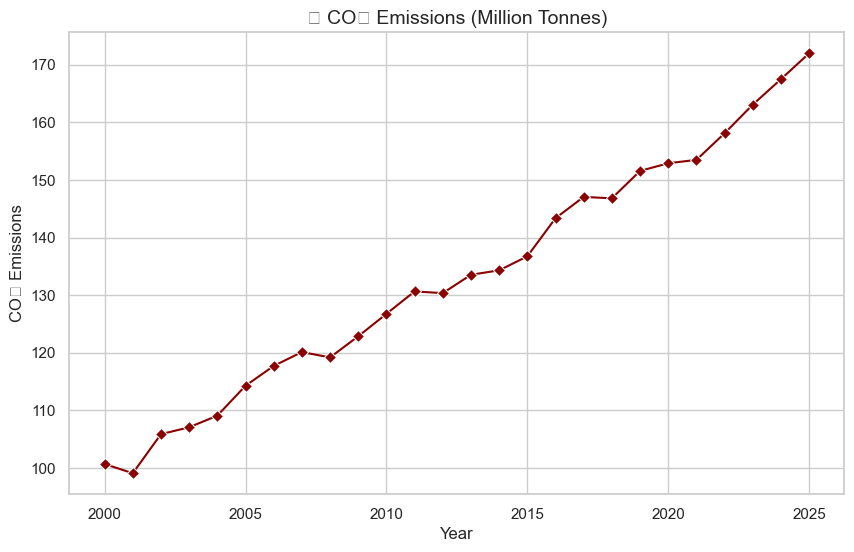

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='CO2_Emissions_MT', marker='D', color='darkred')
plt.title('💨 CO₂ Emissions (Million Tonnes)', fontsize=14)
plt.ylabel('CO₂ Emissions')
plt.grid(True)
plt.show()


c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


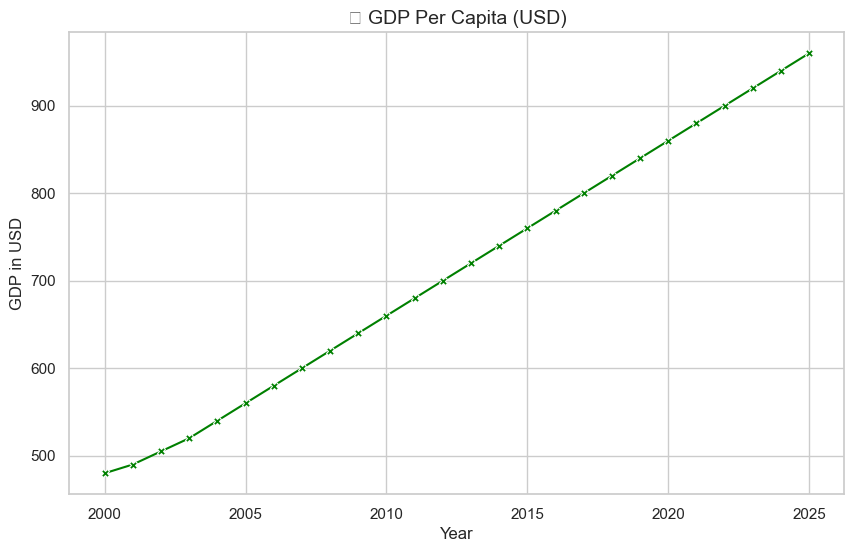

In [41]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='GDP_per_capita_USD', marker='X', color='green')
plt.title('💰 GDP Per Capita (USD)', fontsize=14)
plt.ylabel('GDP in USD')
plt.grid(True)
plt.show()


In [59]:
print(df.columns.tolist())


['Year', 'Avg_Temp_C', 'Category']


In [60]:
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import io

uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

def on_upload_change(change):
    if uploader.value:
        file = uploader.value[0]
        df = pd.read_csv(io.BytesIO(file['content']))
        globals()['df'] = df
        print("✅ File loaded. Columns:\n", df.columns.tolist())
    else:
        print("No file uploaded.")

uploader.observe(on_upload_change, names='value')


FileUpload(value=(), accept='.csv', description='Upload')

In [62]:
print(df.columns.tolist())


['Year', 'Avg_Temp_C', 'Rainfall_mm', 'CO2_Emissions_MT', 'Wheat_Yield_tph', 'Rice_Yield_tph', 'Population_million', 'Climate_Risk_Index', 'Disaster_Count', 'GDP_per_capita_USD', 'Urbanization_Pct', 'Water_Stress_Index', 'Air_Pollution_PM2.5', 'Agricultural_Land_Pct', 'Renewable_Energy_Pct']


C:\Users\GHULAM MUSTAFA\AppData\Local\Temp\ipykernel_6036\2901947771.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\GHULAM MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


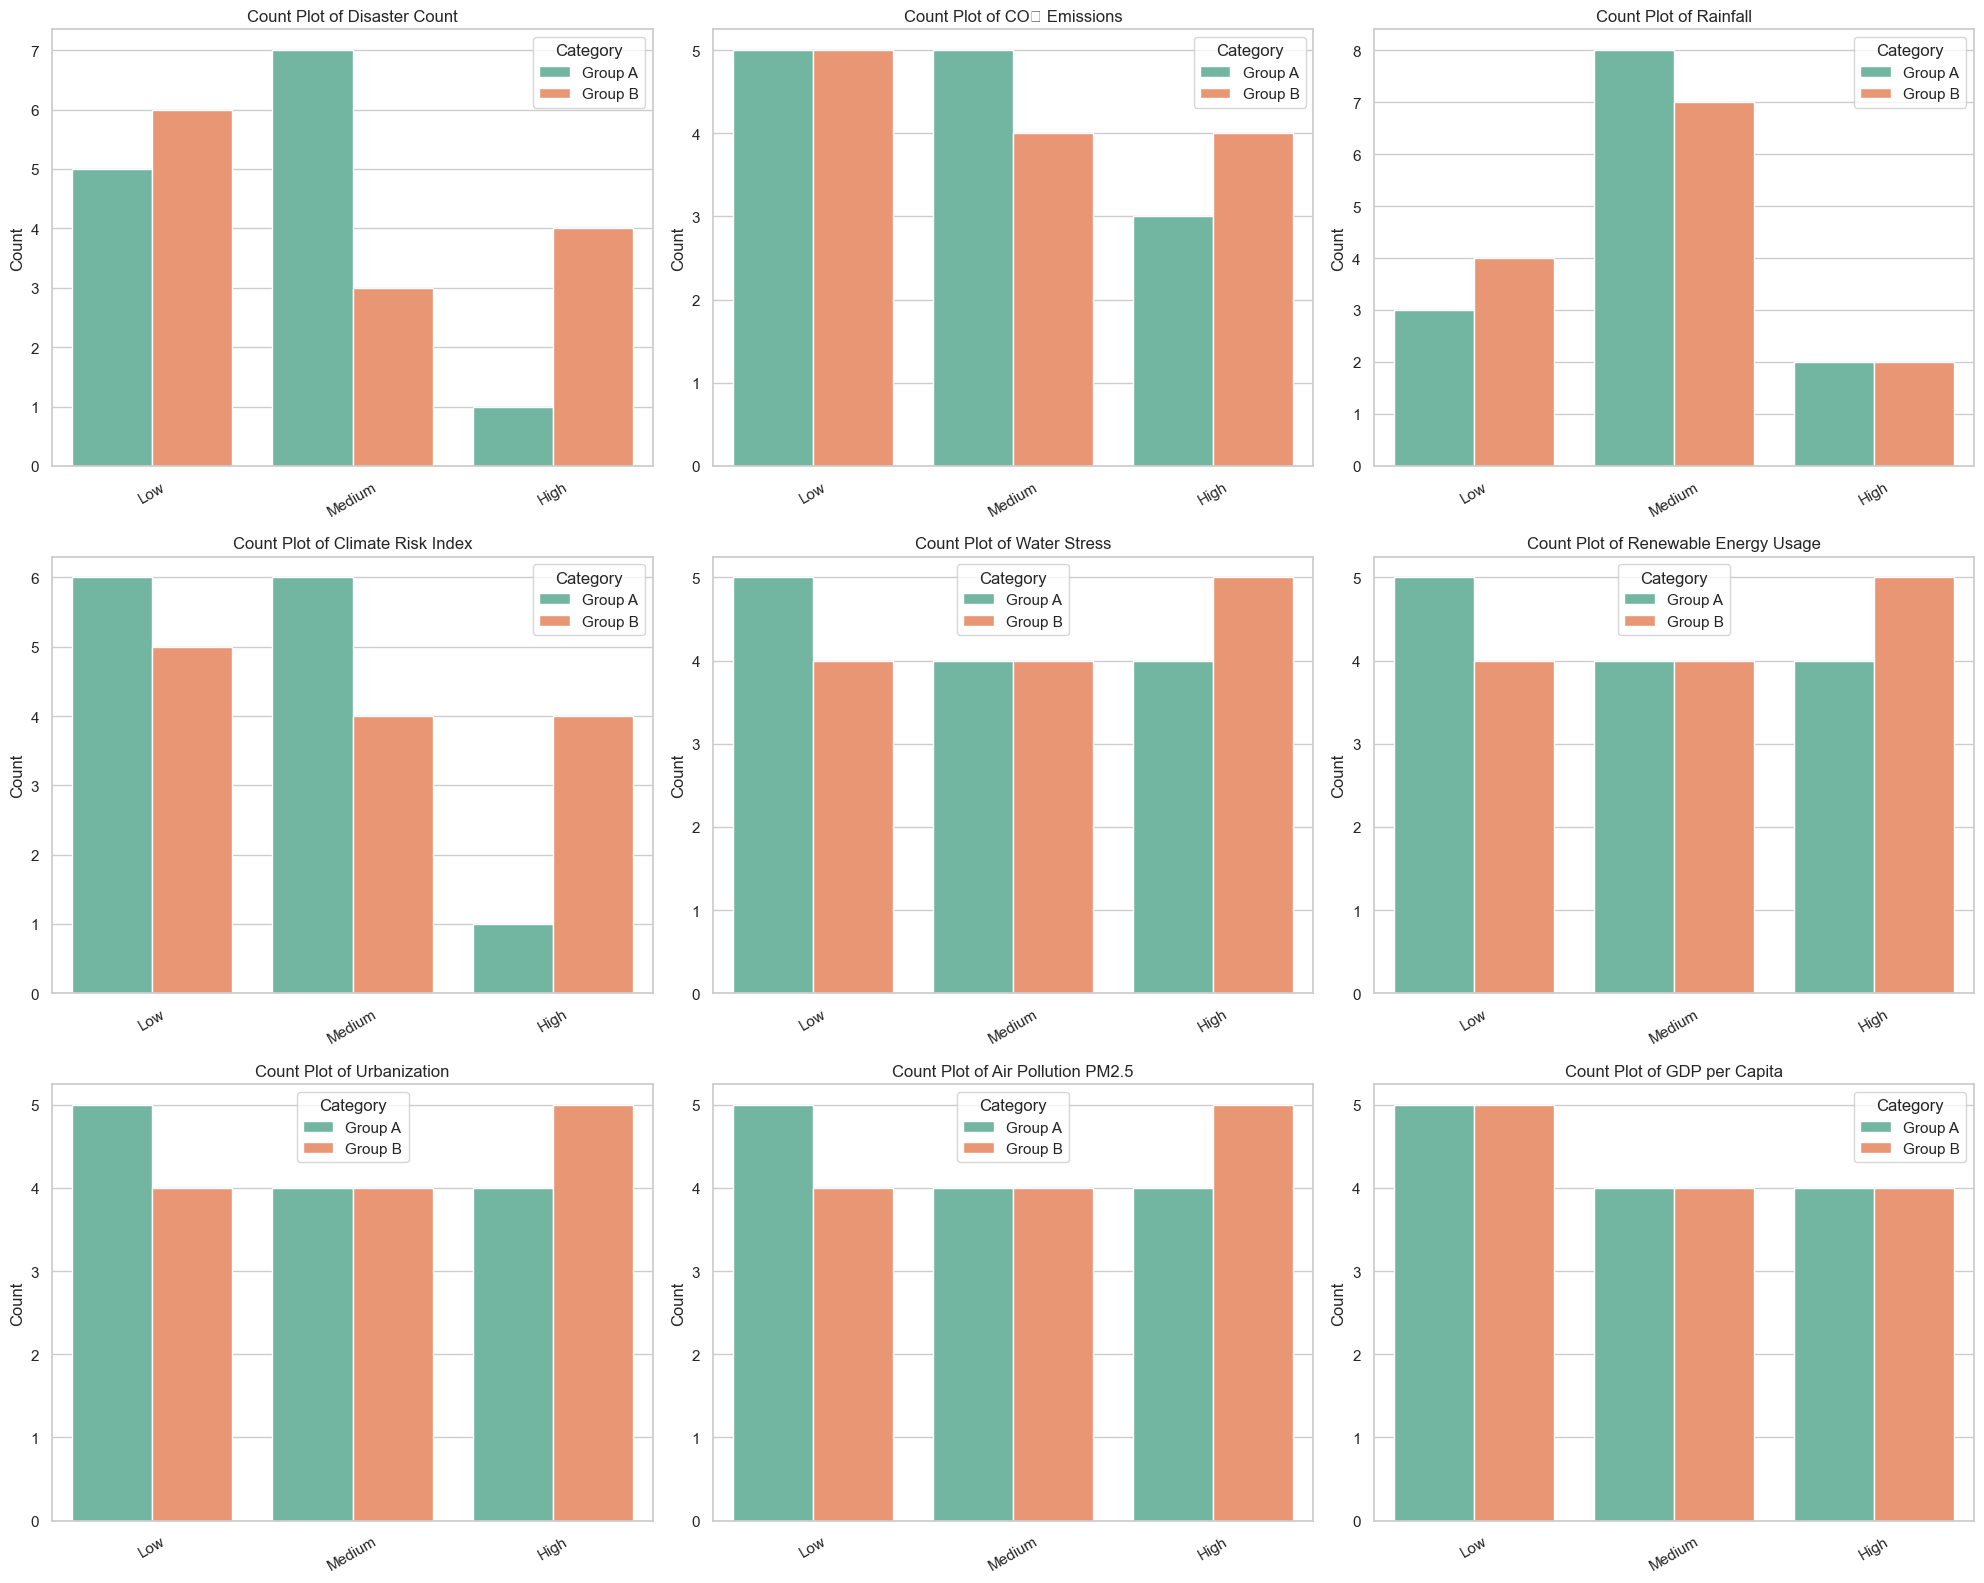

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(".", "_")

# Add a dummy 'Category' column for grouping
df['Category'] = df['Year'].apply(lambda x: 'Group A' if x % 2 == 0 else 'Group B')

# Bin numeric values into categories so countplot can group them
df['Disaster_Level'] = pd.cut(df['Disaster_Count'], bins=[-1, 2, 5, 10], labels=['Low', 'Medium', 'High'])
df['CO2_Level'] = pd.cut(df['CO2_Emissions_MT'], bins=3, labels=['Low', 'Medium', 'High'])
df['Rainfall_Level'] = pd.cut(df['Rainfall_mm'], bins=3, labels=['Low', 'Medium', 'High'])
df['Risk_Level'] = pd.cut(df['Climate_Risk_Index'], bins=3, labels=['Low', 'Medium', 'High'])
df['WaterStress_Level'] = pd.cut(df['Water_Stress_Index'], bins=3, labels=['Low', 'Medium', 'High'])
df['Renewable_Level'] = pd.cut(df['Renewable_Energy_Pct'], bins=3, labels=['Low', 'Medium', 'High'])
df['Urban_Level'] = pd.cut(df['Urbanization_Pct'], bins=3, labels=['Low', 'Medium', 'High'])
df['AirPollution_Level'] = pd.cut(df['Air_Pollution_PM2_5'], bins=3, labels=['Low', 'Medium', 'High'])
df['GDP_Level'] = pd.cut(df['GDP_per_capita_USD'], bins=3, labels=['Low', 'Medium', 'High'])

# Set up 3x3 subplot layout
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

# Columns to plot
fields = [
    ('Disaster_Level', 'Disaster Count'),
    ('CO2_Level', 'CO₂ Emissions'),
    ('Rainfall_Level', 'Rainfall'),
    ('Risk_Level', 'Climate Risk Index'),
    ('WaterStress_Level', 'Water Stress'),
    ('Renewable_Level', 'Renewable Energy Usage'),
    ('Urban_Level', 'Urbanization'),
    ('AirPollution_Level', 'Air Pollution PM2.5'),
    ('GDP_Level', 'GDP per Capita')
]

# Generate countplots
for i, (col, title) in enumerate(fields):
    sns.countplot(data=df, x=col, hue='Category', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Count Plot of {title}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


#The dataset presents Pakistan's climate and economic trends from 2000 to 2025. It shows a steady rise in temperature, CO₂ emissions, and urbanization, alongside moderate growth in GDP per capita. While agriculture remains stable, disaster frequency and water stress reflect increasing climate risks. Renewable energy usage is gradually improving, signaling a shift toward sustainability.
